In [1]:
%matplotlib inline

In [2]:
import pandas as pd

In [3]:
import matplotlib

In [4]:
df = pd.read_table("https://raw.githubusercontent.com/TheUpshot/chipotle/master/orders.tsv")

In [5]:
df.head(5)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


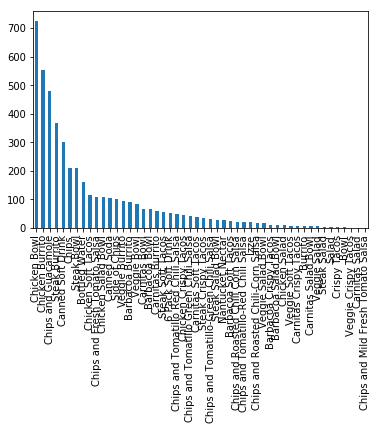

In [6]:
items = df.item_name.value_counts().plot(kind="bar")

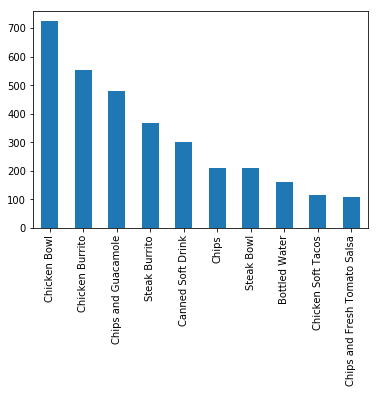

In [7]:
items = df.item_name.value_counts()[:10].plot(kind="bar")

In [8]:
df['item_price'] = df['item_price'].str.replace('$','')

In [9]:
df['item_price'] = df['item_price'].astype('float')

In [10]:
orders = df.groupby('order_id').sum()

In [11]:
orders.head()

,quantity,item_price
order_id,,
1,4,11.56
2,2,16.98
3,2,12.67
4,2,21.00
5,2,13.70


In [12]:
orders['item_price'].describe()

count    1834.000000
mean       18.811429
std        11.652512
min        10.080000
25%        12.572500
50%        16.200000
75%        21.960000
max       205.250000
Name: item_price, dtype: float64

In [13]:
descriptions = df.groupby(['item_name', 'choice_description'])['order_id'].count().reset_index(name="count")

In [14]:
descriptions.head()

,item_name,choice_description,count
0,6 Pack Soft Drink,[Coke],21
1,6 Pack Soft Drink,[Diet Coke],24
2,6 Pack Soft Drink,[Lemonade],2
3,6 Pack Soft Drink,[Nestea],2
4,6 Pack Soft Drink,[Sprite],5


In [15]:
descriptions = descriptions[descriptions['item_name'].str.contains("Canned Soda")]

In [16]:
descriptions.sort_values(['count'], ascending=False)

,item_name,choice_description,count
170,Canned Soda,[Coca Cola],26
173,Canned Soda,[Dr. Pepper],18
175,Canned Soda,[Sprite],17
171,Canned Soda,[Diet Coke],15
174,Canned Soda,[Mountain Dew],15
172,Canned Soda,[Diet Dr. Pepper],13


In [17]:
descriptions = descriptions[descriptions['item_name'].str.contains("Chicken Bowl")] 

In [18]:
descriptions.sort_values(['count'], ascending=False)[:10]

,item_name,choice_description,count
